metrix(평가지표)

- MAE (Mean Absolute Error) : 오차 절대값 평균

- MSE (Mean Squared Error) : 오차 제곱 평균

- RMSE (Root Mean Squared Error) : "오차 제곱 평균"의 제곱근


R Squared (결정계수) : 예측값 Variance / 실제값 Variance (1에 가까울수록 정확도가 높다)


confusion metrix (혼동 행렬)

- TP (True Positive)
- FP (False Positive)
- TN (True Negative)
- FN (False Negative)

accuracy (score) : 정답 / 전체 -> TP + TN / (TP + TN + FP + FN)

f1_score : Presision과 Recall의 조화 평균

2 * (precision * recall / (precision + recall))

- Presision (정밀도) : TP / (TP + TN) (True로 분류한 것 중 정답 비율)

- Recall (재현율 / 민감도) : TP / TP + FN (실제 True 중 True로 예측한 비율)

- TPR (True Positive Rate) : TP / (TP + FN) (=Recall)

- FPR (False Positive Rate) : FP / (FP + TN) (실제 False 중 False로 에측한 비율)


ROC (Receiver Operating Characteristic)

- 재현율을 좀 더 명확하게 판단하기 위함

- 판별 기준이 낮을수록 positive로 예측하는 수가 증가

ROC는 0~1까지의 그래프로 그려진다 (비율이니까)


AUC는 1인 경우에 가장 분류 모델의 성능이 좋다고 판단


AUC는 0.5 보다 크면 무작위로 만든 분류모델보다는 성능이 좋다고 판단. 
반대로 0.5 보다 작으면 분류 모델에 문제가 있다고 판단

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
predict = model.predict(x_test)
predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [8]:
# 모델이 잘 만들어져있는지 평가해야 함
# 예측한 값과 실제 값을 배열로 만들어줌
cm = confusion_matrix(y_test, predict)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

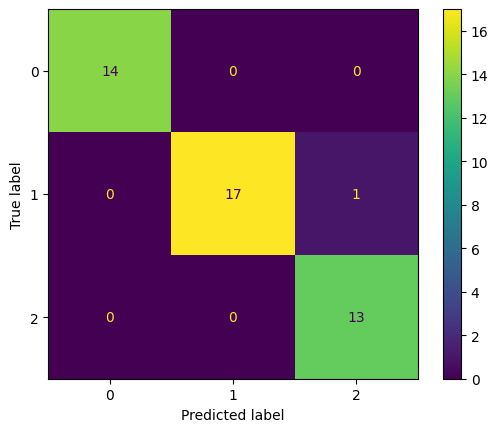

In [9]:
# 그래픽으로 보여줌
# x축이 x_test / y축이 predict
ConfusionMatrixDisplay(cm).plot()

In [10]:
# average defalut : binary (이진분류)
# 지금은 3개여서 average=None으로
# 정밀도랑 재현율로 모델을 평가하겠다

# presicion(정확도) : True라고 분류한 것들 중 정답(실제True)인 비율
precision = precision_score(y_test, predict, average=None)

for target, score in zip(iris.target_names, precision):
    print(f"{target}의 정밀도 : {score}")

setosa의 정밀도 : 1.0
versicolor의 정밀도 : 1.0
virginica의 정밀도 : 0.9285714285714286


In [12]:
# recall : 실제 True 중 True로 예측한 비율
# 실제 정답 중에서 정답이었던 것들
recall = recall_score(y_test, predict, average=None)
for target, score in zip(iris.target_names, recall):
    print(f"{target}의 재현률 : {score}")

setosa의 재현률 : 1.0
versicolor의 재현률 : 0.9444444444444444
virginica의 재현률 : 1.0


In [13]:
# 만일 데이터가 불균형할 때는 어떻게 평가해야 될까?
# precision과 recall의 조화평균

# 2 * (precision * recall) / (precision + recall)
# F1 스코어에 2를 곱하여 범위를 조정하면 0부터 1까지의 값을 가지게 하기 위해서

f1 = f1_score(y_test, predict, average=None)
for target, score in zip(iris.target_names, f1):
    print(f"{target}의 f: {score}")

setosa의 f: 1.0
versicolor의 f: 0.9714285714285714
virginica의 f: 0.962962962962963


In [14]:
# 정분류율 (전체 관측치 중에서 실제값과 예측치가 일치하는 정도)
accuracy = accuracy_score(y_test, predict)
print(accuracy)

0.9777777777777777


In [15]:
report = classification_report(y_test, predict, output_dict=True)
report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14.0},
 '1': {'precision': 1.0,
  'recall': 0.9444444444444444,
  'f1-score': 0.9714285714285714,
  'support': 18.0},
 '2': {'precision': 0.9285714285714286,
  'recall': 1.0,
  'f1-score': 0.962962962962963,
  'support': 13.0},
 'accuracy': 0.9777777777777777,
 'macro avg': {'precision': 0.9761904761904763,
  'recall': 0.9814814814814815,
  'f1-score': 0.9781305114638448,
  'support': 45.0},
 'weighted avg': {'precision': 0.9793650793650793,
  'recall': 0.9777777777777777,
  'f1-score': 0.9778718400940623,
  'support': 45.0}}

In [16]:
import pandas as pd

In [18]:
# 보기 쉽게 데이터프레임으로 만들자!
df = pd.DataFrame(report)
df.rename(columns=dict(zip(["0", "1", "2"], iris.target_names)), inplace=True)
df

# support 같은 건 나중에 보기

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.928571,0.977778,0.976190,0.979365
recall,1.0,0.944444,1.000000,0.977778,0.981481,0.977778
f1-score,1.0,0.971429,0.962963,0.977778,0.978131,0.977872
support,14.0,18.000000,13.000000,0.977778,45.000000,45.000000


In [19]:
# 예측 확률 (클래스에 대한 출력 : 0 ~ 1 사이, 출력의 총 합 1)

proba = model.predict_proba(x_test)
proba

# 로지스틱은 분류할 때 확률로 나옴
# 0일 확률 , 1일 확률 , 2일 확률
# [9.84968969e-01, 1.50309467e-02, 8.45019400e-08] 
# 첫번째가 0.9(90%) 으로 제일 높으니까 0이 나올 것

array([[9.84968969e-01, 1.50309467e-02, 8.45019400e-08],
       [2.74317504e-01, 7.21957911e-01, 3.72458482e-03],
       [6.85203986e-03, 8.68226198e-01, 1.24921763e-01],
       [9.85541731e-01, 1.44580445e-02, 2.24632211e-07],
       [1.60257936e-06, 2.00029008e-02, 9.79995497e-01],
       [4.79546368e-03, 5.88116532e-01, 4.07088005e-01],
       [1.74093794e-04, 1.29820806e-01, 8.70005100e-01],
       [9.58095060e-01, 4.19014093e-02, 3.53029141e-06],
       [9.68322338e-01, 3.16768211e-02, 8.41277389e-07],
       [1.33848323e-05, 3.11571063e-02, 9.68829509e-01],
       [1.98639434e-02, 8.69054695e-01, 1.11081362e-01],
       [9.66970510e-01, 3.30280924e-02, 1.39780491e-06],
       [6.97444281e-06, 3.82952864e-02, 9.61697739e-01],
       [7.67760698e-03, 7.67233708e-01, 2.25088685e-01],
       [7.45226110e-03, 7.31222869e-01, 2.61324870e-01],
       [9.87364552e-01, 1.26352507e-02, 1.97020516e-07],
       [2.35583388e-02, 9.29625783e-01, 4.68158786e-02],
       [1.15210301e-02, 6.61654

In [20]:
proba.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
import matplotlib.pyplot as plt

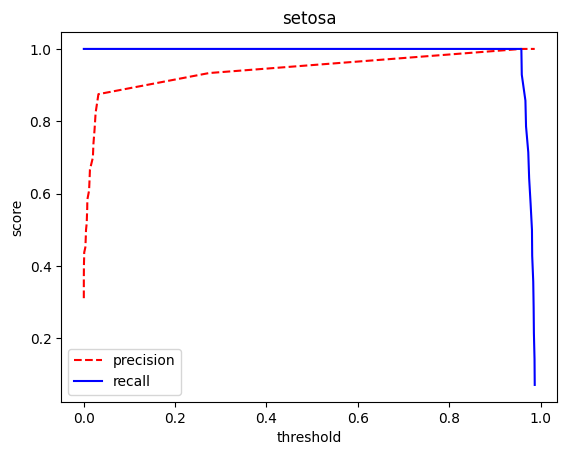

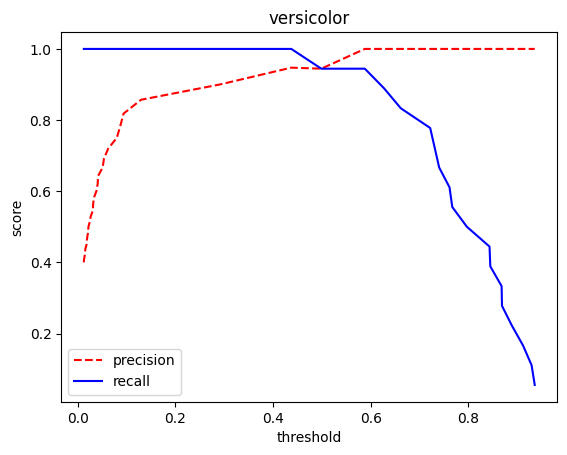

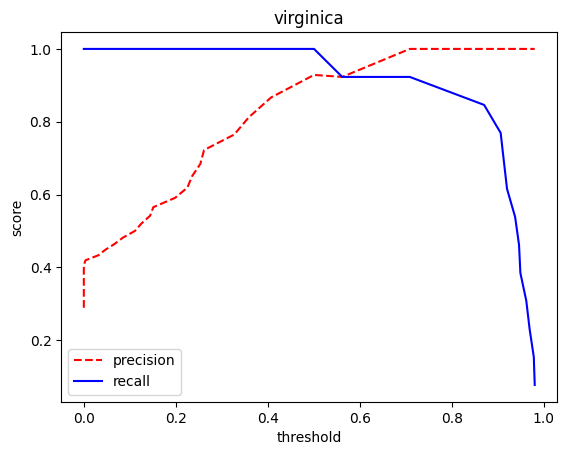

In [22]:
# threshold : 임계값을 기준으로 올라갈 때랑 임계값을 기준으로 내려갈 때 TPR, FPR이 어떤 일이 발생하는지
# 보통은 0.5를 기준으로 함 (오늘 찾아보고 공부할 것)


for i in range(len(iris.target_names)):
    precision, recall, thresholds = precision_recall_curve(y_test, proba[:, i], pos_label=int(i))
    plt.xlabel("threshold")
    plt.ylabel("score")

    plt.plot(thresholds, precision[:len(thresholds)], "red", linestyle="--", label="precision")
    plt.plot(thresholds, recall[:len(thresholds)], "blue", label="recall")

    plt.legend()
    plt.title(iris.target_names[i])
    plt.show()

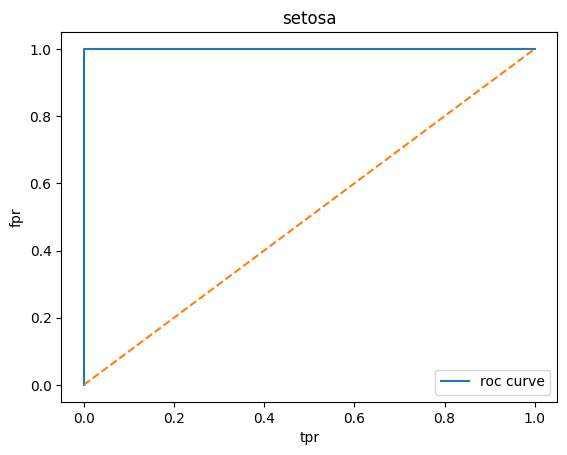

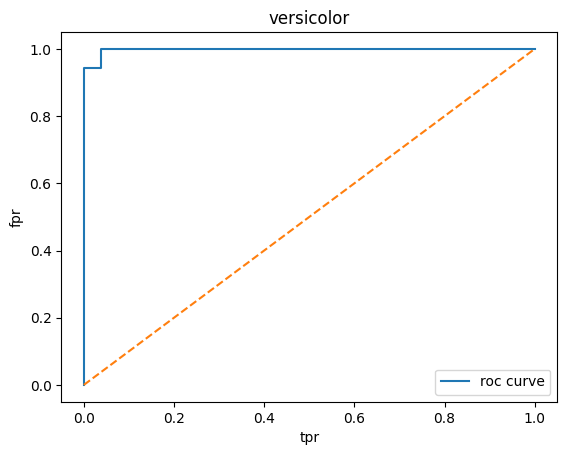

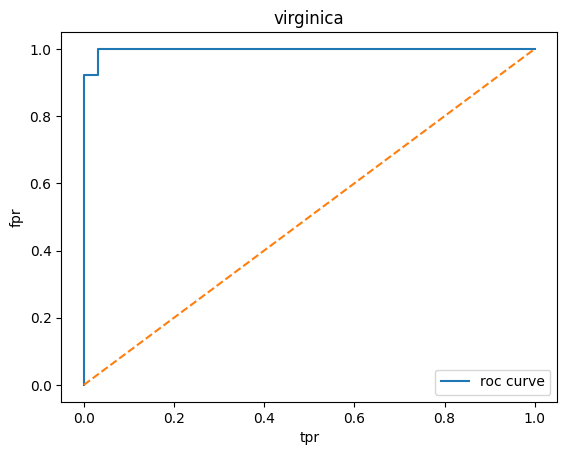

In [25]:
# ROC curve
# Receiver Operating Characteristic

# AUC
# Area Under the ROC Curve

for i in range(len(iris.target_names)):
    fprs, tprs, thresholds = roc_curve(y_test, proba[:, i], pos_label=i)

    plt.plot(fprs, tprs, label="roc curve")

    # auc가 0.5 일때는 직선 (분류를 못하고 있다)

    plt.plot([0, 1], [0, 1], "--")

    plt.title(iris.target_names[i])

    plt.xlabel("tpr")
    plt.ylabel("fpr")
    plt.legend()
    plt.show()

In [26]:
# 임계값 (threshold)을 변화시키면 FPR이 변하게 된다

# 임계값이 높으면 정밀도가 높아지고 FP가 낮아지므로 FPR은 0

# 임계값이 낮으면 FP가 높아지고 TN은 0이므로 FPR은 1

# 즉 임계값을 낮추면 더 많은 항목이 양성으로 분류되므로 FPR과 TPR이 모두 증가

In [ ]:
임계값을 낮춘다는 것은 
Negative를 Positive로 예측한 경우(FP)가 증가
실제 Positve를 Negative로 예측한 경우(FN) 감소함을 의미

임계값을 낮춘다는 것은 모델이 positive(양성)로 예측하는 기준을 완화

재현율 = TP / (FN +TP)은 증가하게 되고 

정밀도 = TP / (FP +TP)는 감소하는 것